# Implementação PCA e Análise Multivariada

## Preparação

### Carregamento das Bibliotecas

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

proj_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(proj_root)
from src.funcoes_pca import*

### Carregamentos dos Dados

In [2]:
caminho_dados = "../dados/student_habits_preprocessed.csv"

# Executando o pré processamento
df = pd.read_csv(caminho_dados)



## Pré-PCA

### Variáveis Dummy

Precisamos transformar nossas variáveis categóricas, que observamos anteriormente no pré-processamento, em numéricas para que seja possível aplicar a Análise de Componente Principal.

In [3]:
#Todas as Colunas presentes no dataframe
print(df.columns)

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'performance_class'],
      dtype='object')


In [4]:
#Visualização dos primeiros elementos do dataframe
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

Agrupamos as variáveis categóricas numa lista para aplicar a função get_dummies do pandas, que tem como objetivo criar as variáveis dummy, substituindo os valores categóricos. Também garantimos que os valores substituídos sejam numéricos ao usar dtype = int

In [5]:
#o id do estudante é desconsiderado, já que não nos entrega informações relevantes
#performance_class é nossa class label e associada diretamente com o que queremos prever. Então também não é colocada.
colunas_categoricas = [
    "gender",
    "part_time_job",
    "diet_quality",
    "parental_education_level",
    "internet_quality",
    "extracurricular_participation"
]


In [6]:
df_dummy = pd.get_dummies(df[colunas_categoricas], drop_first= True, dtype = int) 
#drop_first evita multicolinearidade ao omitir uma variável dummy associada. Podemos inferir a variável dummy omitida.
print(df_dummy.head())

   gender_Male  gender_Other  part_time_job_Yes  diet_quality_Good  \
0            0             0                  0                  0   
1            0             0                  0                  1   
2            1             0                  0                  0   
3            0             0                  0                  0   
4            0             0                  0                  0   

   diet_quality_Poor  parental_education_level_High School  \
0                  0                                     0   
1                  0                                     1   
2                  1                                     1   
3                  1                                     0   
4                  0                                     0   

   parental_education_level_Master  internet_quality_Good  \
0                                1                      0   
1                                0                      0   
2                      

Com os valores substituídos por 0s e 1s em variáveis mais específicas, juntamos os valores numéricos e categóricos novamente ao dataframe.

In [7]:
#exam_score representa o desempenho do aluno e é o que queremos prever. Portanto, não mantemos sua coluna no dataframe
colunas_numericas = [
    "age",
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "attendance_percentage",
    "sleep_hours",
    "exercise_frequency",
    "mental_health_rating",
]

In [8]:
#juntamos novamente as colunas no dataframe. Agora, com apenas preditores numéricos
df_final = pd.concat([df[colunas_numericas], df_dummy], axis = 1) # axis = 1 para agrupar por coluna
print(df_final.head())

   age  study_hours_per_day  social_media_hours  netflix_hours  \
0   23                  0.0                 1.2            1.1   
1   20                  6.9                 2.8            2.3   
2   21                  1.4                 3.1            1.3   
3   23                  1.0                 3.9            1.0   
4   19                  5.0                 4.4            0.5   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   85.0          8.0                   6   
1                   97.3          4.6                   6   
2                   94.8          8.0                   1   
3                   71.0          9.2                   4   
4                   90.9          4.9                   3   

   mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
0                     8            0             0                  0   
1                     8            0             0                  0   
2                

### Centering e Scaling

In [9]:
print('Médias:\n', df_final.mean())

Médias:
 age                                     20.501532
study_hours_per_day                      3.520327
social_media_hours                       2.483146
netflix_hours                            1.803984
attendance_percentage                   84.127681
sleep_hours                              6.463841
exercise_frequency                       3.036772
mental_health_rating                     5.436159
gender_Male                              0.479060
gender_Other                             0.041879
part_time_job_Yes                        0.213483
diet_quality_Good                        0.378958
diet_quality_Poor                        0.181818
parental_education_level_High School     0.481103
parental_education_level_Master          0.167518
internet_quality_Good                    0.447395
internet_quality_Poor                    0.161389
extracurricular_participation_Yes        0.318693
dtype: float64


In [10]:
print(f'Desvio padrão: \n {df_final.std()}')

Desvio padrão: 
 age                                     2.309567
study_hours_per_day                     1.439092
social_media_hours                      1.149425
netflix_hours                           1.057254
attendance_percentage                   9.314441
sleep_hours                             1.220036
exercise_frequency                      2.025572
mental_health_rating                    2.853757
gender_Male                             0.499817
gender_Other                            0.200416
part_time_job_Yes                       0.409975
diet_quality_Good                       0.485376
diet_quality_Poor                       0.385892
parental_education_level_High School    0.499898
parental_education_level_Master         0.373628
internet_quality_Good                   0.497479
internet_quality_Poor                   0.368078
extracurricular_participation_Yes       0.466208
dtype: float64


In [11]:
#centralização dos dados
df_central = df_final - df_final.mean()
#escalonamento
df_escal = df_central/df_final.std()
print(df_escal.head())

        age  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.081791            -2.446213           -1.116337      -0.665861   
1 -0.217154             2.348475            0.275663       0.469155   
2  0.215827            -1.473378            0.536663      -0.476691   
3  1.081791            -1.751331            1.232663      -0.760445   
4 -0.650136             1.028199            1.667663      -1.233369   

   attendance_percentage  sleep_hours  exercise_frequency  \
0               0.093652     1.259110            1.462909   
1               1.414182    -1.527694            1.462909   
2               1.145782     1.259110           -1.005530   
3              -1.409390     2.242688            0.475534   
4               0.727077    -1.281799           -0.018154   

   mental_health_rating  gender_Male  gender_Other  part_time_job_Yes  \
0              0.898409    -0.958472     -0.208963          -0.520722   
1              0.898409    -0.958472     -0.208963          

## Matriz de Covariância e Autovetores/Autovalores

### Cálculo da Matriz de Covariância

In [12]:
mcov = np.cov(df_escal, rowvar = False) # aqui a escolha de usar numpy no lugar de df.cov() é para facilitar as operações com a matriz cov para calcular os autovetores/valores
print(mcov) # a saída é um n-dimensional array e não um dataframe

[[ 1.00000000e+00  1.56033192e-02 -4.24636725e-03 -9.27774106e-03
  -1.53710128e-02  4.02263369e-02 -6.67754382e-04 -4.54788962e-02
   2.99224870e-02  1.64288219e-02 -7.36498061e-03 -1.37442453e-02
  -6.04923531e-03 -2.32225130e-02 -1.21469897e-02  3.23301764e-02
   1.77507353e-02  4.95666335e-04]
 [ 1.56033192e-02  1.00000000e+00  1.59268018e-02 -3.69749856e-02
   2.00328165e-02 -2.16178724e-02 -3.61406496e-02 -8.98290657e-03
  -2.26499587e-02  1.47713954e-02 -3.40517948e-02  9.45457092e-03
  -7.90220452e-02  1.41080577e-02  6.78206325e-03 -1.43275041e-03
  -1.83606774e-02 -1.66758883e-02]
 [-4.24636725e-03  1.59268018e-02  1.00000000e+00  5.14576029e-03
   2.75221674e-02  2.07536441e-02 -3.91271054e-02  3.49020459e-03
  -1.22725805e-02  1.72707190e-02  1.15487812e-02  2.86876400e-02
   3.91889785e-03  2.19558804e-02  2.15805547e-02  4.30624317e-02
  -1.26569847e-02 -2.14500423e-02]
 [-9.27774106e-03 -3.69749856e-02  5.14576029e-03  1.00000000e+00
  -5.67308788e-03 -1.33958366e-02 -4.

### Cálculos dos Autovetores e Autovalores

In [13]:
autovalores,autovetores = np.linalg.eig(mcov)
#Ordenamento dos autovalores - encontrar o autovalor de maior variância e seu autovetor associado (loadings do PC1)
idx = autovalores.argsort()[::-1] # argsort do numpy retorna os indíces que ordenam os valores crescentemente. [::-1] inverte a ordem, retornando os índices descrescentes.
autovalores = autovalores[idx]
autovetores[:, idx]

array([[-0.03192655, -0.03061418, -0.00403085,  0.02605573,  0.1553094 ,
        -0.57814677,  0.30976568,  0.17964527,  0.00367872,  0.14541542,
         0.51264969, -0.12025567, -0.27803396,  0.32978884, -0.1221519 ,
        -0.05751997,  0.04959206,  0.07458921],
       [-0.0504836 ,  0.10378841, -0.02251135, -0.29480252,  0.43909613,
        -0.00602761, -0.13177373,  0.1853572 ,  0.04166964, -0.14212891,
         0.32502553,  0.3195263 ,  0.63779883,  0.03939205, -0.05170834,
        -0.06139866, -0.08663986, -0.0523068 ],
       [-0.0705772 ,  0.05092288,  0.07653289, -0.13915164,  0.12033338,
         0.17146889,  0.60240015, -0.35790915,  0.20851903, -0.14467372,
        -0.0853833 ,  0.54172221, -0.19970301,  0.08624939, -0.07905954,
         0.06595335,  0.08435779, -0.04623835],
       [-0.06614806,  0.01728402,  0.12111645,  0.16572056, -0.28631717,
         0.17661702,  0.06592831, -0.09486836,  0.36633559,  0.70239956,
         0.27788933,  0.07266185,  0.26313001, -0.132

In [14]:
print(autovalores[0], autovalores[1])

1.527228573770263 1.4495287481179908


In [15]:
print(autovetores[:,0], autovetores[:,1])

[-0.03192655 -0.0504836  -0.0705772  -0.06614806  0.13984889 -0.01246866
  0.09927569  0.11717533  0.09361841 -0.03517131 -0.0175791  -0.16663536
  0.19792838  0.41557562 -0.43834059 -0.51348274  0.48039208  0.0850671 ] [-0.03061418  0.10378841  0.05092288  0.01728402 -0.06876428 -0.11610829
  0.00969737  0.09829485  0.01904391  0.00265826  0.13513321  0.50276442
 -0.50121098  0.43045919 -0.427301    0.16538001 -0.17749823 -0.08989229]


## Plotagem PC1 x PC2

### Cálculo dos componentes principais

In [16]:
df_pca = np.dot(df_escal, autovetores)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range (autovetores.shape[1])])

In [17]:
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.577844 -2.219673  1.788759  1.250429  0.643060 -0.717258 -0.649661   
1  0.746415  1.874382  0.506755  0.392221 -0.924483 -0.070897 -0.922614   
2  2.713586 -1.887548 -0.128646 -1.117447 -0.906004  0.225670  0.677464   
3 -1.899616 -3.257501  0.618831 -0.639100 -0.590934  0.982991 -0.972977   
4 -2.385721 -1.152842  0.634650 -0.147294  0.533396 -0.158393 -0.202966   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.059945  0.999562 -1.943764 -1.747316 -1.024206 -1.281998 -0.892370   
1 -0.901901  1.559867  1.429798  1.079018  1.074365  1.144516 -1.293691   
2  0.364817 -1.452653  1.019553 -0.477295 -0.949835 -0.700552  1.845670   
3  0.421546 -0.499734 -1.069603 -2.485326 -1.193566  0.737293  1.053288   
4 -0.911892  0.552092  2.434343  0.987630 -0.446892  1.396041  0.076875   

       PC15      PC16      PC17      PC18  
0 -1.123921 -0.394806 -0.260739 -0.541750  
1 -0.76439

### Pegando só PC1 e PC2 para a plotagem

In [18]:
Z = df_escal @ autovetores[:,:2]
print(Z)
Z = np.array(Z)

            0         1
0   -0.577844 -2.219673
1    0.746415  1.874382
2    2.713586 -1.887548
3   -1.899616 -3.257501
4   -2.385721 -1.152842
..        ...       ...
974 -0.050524  0.327302
975  1.508965 -0.869085
976 -1.094516  0.994710
977 -0.176193 -0.353319
978 -0.301194  0.638173

[979 rows x 2 columns]


In [19]:
print(autovalores.sum())
print(f'{100*autovalores[0]/autovalores.sum()} %')

17.999999999999993
8.484603187612576 %


In [20]:
print(autovalores)

[1.52722857 1.44952875 1.37827319 1.17643522 1.11208577 1.07859784
 1.031394   1.0153356  0.99693168 0.98377531 0.97470357 0.94781955
 0.92764301 0.88925732 0.7786076  0.6133398  0.58105895 0.53798427]


In [21]:
desempenho = df['performance_class']
print(desempenho)

0      Recuperação
1        Excelente
2        Reprovado
3        Reprovado
4      Recuperação
          ...     
974            Bom
975    Recuperação
976    Recuperação
977    Recuperação
978            Bom
Name: performance_class, Length: 979, dtype: object


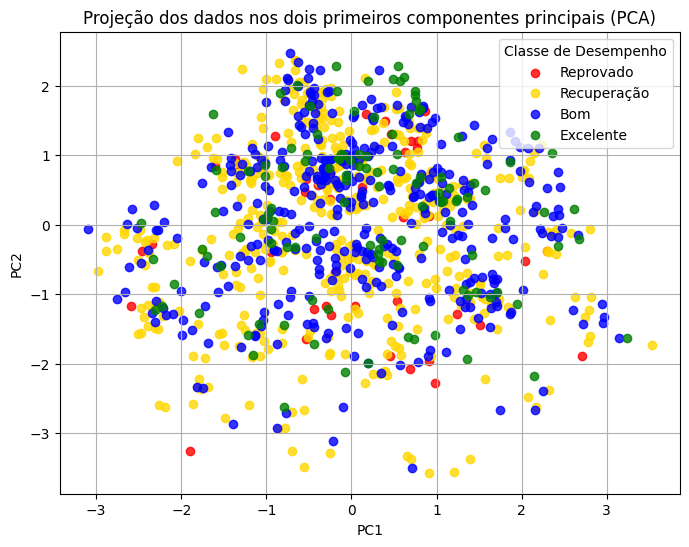

In [ ]:
#dicionário de cores
cores = {
    'Reprovado' : 'red',
    'Recuperação' : 'gold',
    'Bom' : 'blue',
    'Excelente' : 'green'
}
plt.figure(figsize=(8, 6))

for label in ["Reprovado", "Recuperação", "Bom", "Excelente"]:
    desemp = desempenho == label
    plt.scatter(Z[desemp, 0], Z[desemp, 1], label=label, alpha=0.8, c=cores[label]) #scatter plot com ajuste de cores de acordo com o dicionário

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projeção dos dados nos dois primeiros componentes principais (PCA)')
plt.legend(title="Classe de Desempenho")
plt.grid(True)
plt.savefig("resultados/figuras_pca/projecao_dados.png")


### Scree Plot

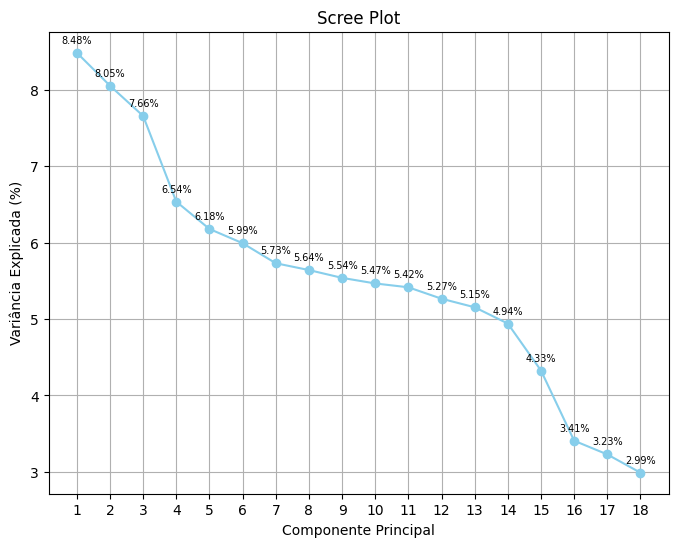

In [ ]:
n_componentes_array = np.arange(len(autovalores))+1 #array de n elementos; n = número de preditores; cada elemento é o anterior + 1
variancia_exp = 100* (autovalores/autovalores.sum()) #cálculo da variância explicada

plt.figure(figsize=(8, 6))
plt.plot(n_componentes_array, variancia_exp, '-o', color = 'skyblue')
#posicionamento dos valores de porcentagem acima de cada ponto
for i, val in enumerate(variancia_exp):
    plt.text(n_componentes_array[i], val+0.1, f'{val:.2f}%', 
             ha='center', va='bottom', fontsize=7, color='black'
    )


plt.title("Scree Plot")
plt.grid()
plt.xticks(n_componentes_array)
plt.xlabel("Componente Principal")
plt.ylabel("Variância Explicada (%)")
plt.savefig("resultados/figuras_pca/scree_plot.png")

### Biplot

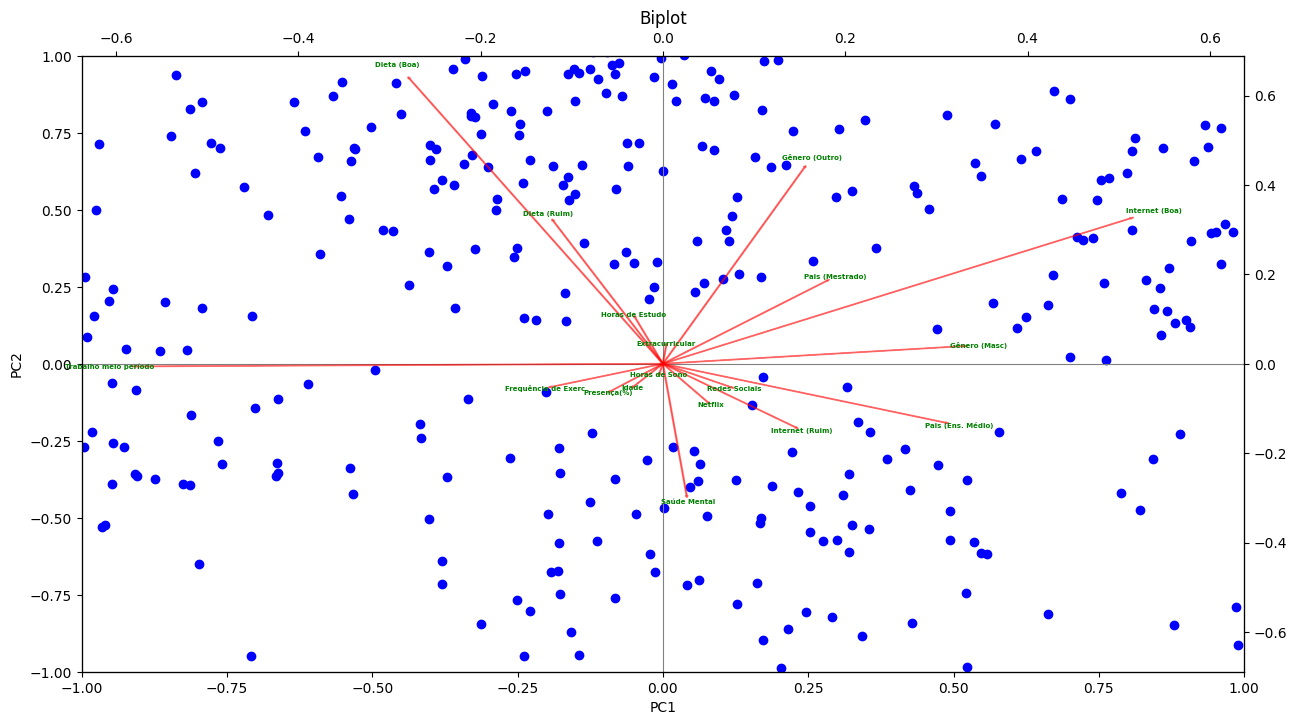

In [24]:
df_loads = pd.DataFrame(
    autovetores[:2, :],          # apenas PC1 e PC2
    index=['PC1', 'PC2'],        # nomeia as linhas
    columns=df_final.columns     # nomeia as colunas pelas variáveis originais
)
biplot(df_pca, df_loads)